In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lorenz_attractor import simulate_lorenz,sample_gaussian_ic

import sys
sys.path.append('../')
from src.embedding import Embedding
from src.embedding_position import EmbeddingPosition
from src.markov_analysis import Markov
from umap import UMAP

from matplotlib import cm 



In [6]:
t_span = (0, 100)
dt = 0.01

Nsample = 10
ics = sample_gaussian_ic(N=Nsample, center=(0,1,1), sigma=(0.2,0.2,0.2), rng=np.random.default_rng(0))

Nclusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,40,50,100,200,300,500,1000]
Taus = [1]#,2,3,4,5,6,7,8,9,10,11,12,15,17,20]#,25,30,50,100]
Klist = [1,2,3,4,5,6,7,8,9,10,15,20]

In [7]:
series = list()
for i in range(Nsample):
    t, xyz = simulate_lorenz(t_span, ics[i], dt)
    series.append(xyz[:, 0][:,np.newaxis])  # Use the x-component for entropy calculation
series = np.array(series)
print(series.shape)

(10, 10000, 1)


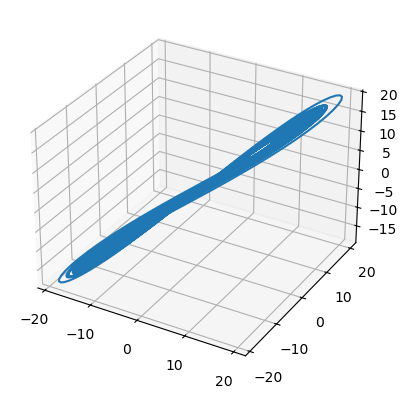

In [8]:
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot(series[0,0:-2,0],series[0,1:-1,0],series[0,2:,0])

In [9]:
emb = Embedding(Y = series)

In [32]:
H = list()
for K in Klist:
    emb.make_embedding(K=K)
    hlist = list()
    for n in Nclusters :
        emb.make_cluster(n_clusters=n)
        h = list()
        for tau in Taus:
            mkv = Markov(emb,tau)
            h.append(mkv.compute_entropy_rate())
        hlist.append(h)
    H.append(hlist)
H = np.array(H)

In [34]:
H.shape

(12, 29, 1)

(0.0, 1.0)

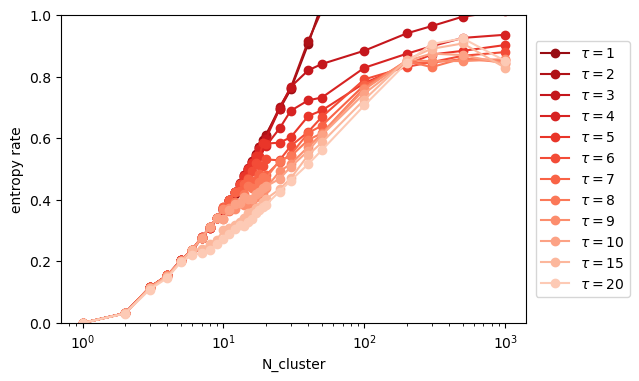

In [42]:
fig,ax = plt.subplots(figsize=(6,4))
colors = cm.Reds(np.linspace(0.2, 0.9, Klist.__len__()))  # Gradient from light to dark red
for i in range(Klist.__len__()):
    ax.plot(np.array(Nclusters),H[i,:,0],marker='o',label=r'$\tau =$'+f"{Klist[i]}",color=colors[Klist.__len__()-1-i])
    ax.set_xscale('log')
    ax.set_xlabel('N_cluster')
    ax.set_ylabel('entropy rate')
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
ax.set_ylim(0,1)

In [10]:
emb = Embedding(Y = series)
emb.make_embedding(K=10)
emb.make_cluster(n_clusters=2)

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
combined = np.append(emb.flatten_embedding_matrix,emb.cluster_centers_,axis=0)
reducer = UMAP(
        n_neighbors=15,
        min_dist=0.15,
        n_components=2,
        metric="euclidean",
    )
reduced_all = reducer.fit_transform(combined)
N = emb.flatten_embedding_matrix.shape[0]
reduced_points = reduced_all[:N]
reduced_centers = reduced_all[N:N + emb.cluster_centers_.shape[0]]


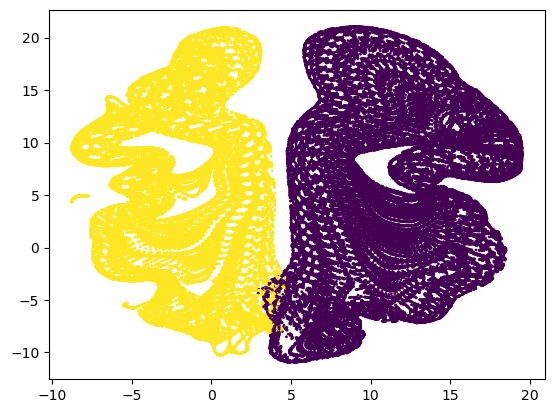

In [12]:
plt.scatter(reduced_points[:,0],reduced_points[:,1],s=1,c=emb.labels)

In [15]:
emb = Embedding(Y = series)
emb.make_embedding(K=20)
emb.make_cluster(n_clusters=2)
t, xyz = simulate_lorenz(t_span, ics[0], dt)
color = emb.classify_trajectory(xyz[:,0][:,np.newaxis])

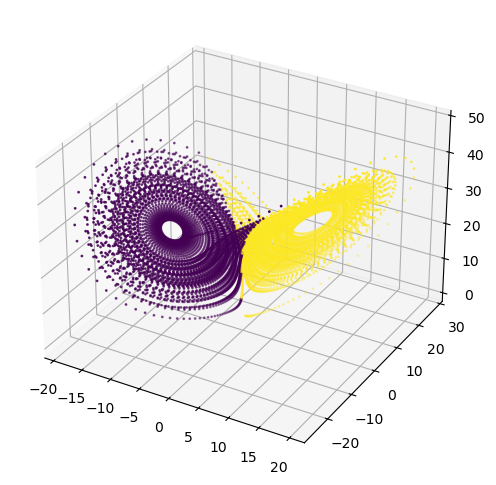

In [16]:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(6,6))
ax.scatter(xyz[:color.shape[0],0],xyz[:color.shape[0],1],xyz[:color.shape[0],2],c=color,s=1)